# Point Machine Characterization Pre-Analysis

Author: **Achmadi ST MT**


## Data Download

Google Drive URL:
- https://drive.google.com/drive/folders/1CWxfkOl5LWltY4T_8nl7TW8mV-lF65bu

Manually download and then folder structure formed like this:

In [1]:
!tree -d data/

data/
└── survey_17042023
    ├── digiducer
    │   ├── wessel1
    │   ├── wessel2
    │   └── wessel3
    └── endaq
        ├── SURVEY
        ├── SURVEY_2
        └── SURVEY_3

10 directories


## Digiducer Data

Digiducer sensor mainly for measure and record vibration on railway structure in uni-axial manner.

For example one vibration record on vertical axis along railway structure while a train passing-by:

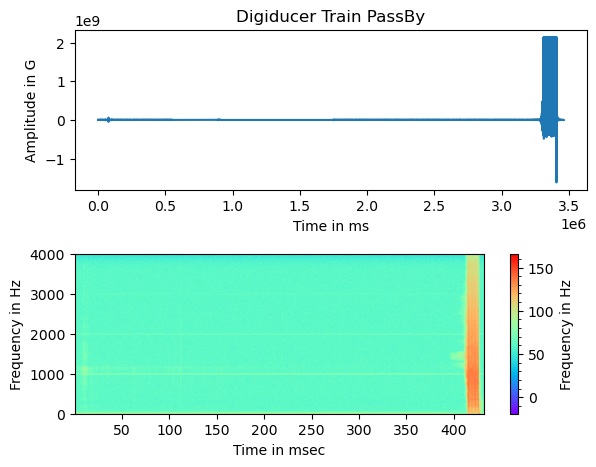

In [2]:
# import necessary modules
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavread

# read one record file
fsDigi, recordDigiRL = wavread('./data/survey_17042023/digiducer/wessel1/input-kereta.wav')

# take one channel
recordDigi = recordDigiRL[:,0]

# show time domain and spectrogram
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig = plt.subplot(211)
plt.title('Digiducer Train PassBy')

plt.plot(recordDigi)
plt.xlabel('Time in ms')
plt.ylabel('Amplitude in G')

plt.subplot(212)
a,b,c,im = plt.specgram(recordDigi, Fs=fsDigi, NFFT=1024, cmap="rainbow")
plt.ylabel('Frequency in Hz')
plt.xlabel('Time in msec')

cbar = plt.colorbar(im)
cbar.set_label('Frequency in Hz')
cbar.minorticks_on()

plt.show()

**NOTES:** Digital value of record still need to calibrate on actual G value.

## Endaq Data

Endaq multisensor mainly for measure and record vibration on point-machine structure, especially in rotation point.

### Install Endaq Python Module

As Endaq record using multirecord, is it required to use their python module:

In [3]:
!pip install endaq

Defaulting to user installation because normal site-packages is not writeable


### Example Analysis

For example, one record on vibration on point-machine's actuator gearbox:

In [4]:
# import necessary module
import endaq.ide as enide
import endaq.ide.measurement as enmeas

# get document
weselDoc = enide.get_doc('./data/survey_17042023/endaq/SURVEY_3/VIB__003-ada ganjalan.IDE')

# show documents table
enide.get_channel_table(weselDoc)

,channel,name,type,units,start,end,duration,samples,rate
0,8.0,X (100g),Acceleration,g,00:00.0001,02:22.0473,02:22.0471,1139754,7999.88 Hz
1,8.1,Y (100g),Acceleration,g,00:00.0001,02:22.0473,02:22.0471,1139754,7999.88 Hz
2,8.2,Z (100g),Acceleration,g,00:00.0001,02:22.0473,02:22.0471,1139754,7999.88 Hz
3,32.0,X (16g),Acceleration,g,00:00.0008,02:22.0484,02:22.0475,55110,386.80 Hz
4,32.1,Y (16g),Acceleration,g,00:00.0008,02:22.0484,02:22.0475,55110,386.80 Hz
5,32.2,Z (16g),Acceleration,g,00:00.0008,02:22.0484,02:22.0475,55110,386.80 Hz
6,36.0,Pressure/Temperature:00,Pressure,Pa,00:00.0001,02:22.0594,02:22.0593,144,1.01 Hz
7,36.1,Pressure/Temperature:01,Temperature,°C,00:00.0001,02:22.0594,02:22.0593,144,1.01 Hz
8,47.0,X,Rotation,dps,00:00.0060,02:22.0493,02:22.0433,28803,202.22 Hz
9,47.1,Y,Rotation,dps,00:00.0060,02:22.0493,02:22.0433,28803,202.22 Hz


### Load Data as Pandas

In [5]:
# import necessary module
import pandas as pd

# load channel as Pandas dataframe
enqData = enide.get_primary_sensor_data(doc=weselDoc, measurement_type=enmeas.ACCELERATION)

# show dataframe
display(enqData)

,X (100g),Y (100g),Z (100g)
timestamp,,,
2023-04-17 07:30:20.001708+00:00,0.876733,0.877060,1.233461
2023-04-17 07:30:20.001833001+00:00,0.884534,0.886555,1.216144
2023-04-17 07:30:20.001958002+00:00,0.904037,0.886555,1.220474
2023-04-17 07:30:20.002083003+00:00,0.896236,0.880225,1.224803
2023-04-17 07:30:20.002208004+00:00,0.900136,0.889720,1.203157
...,...,...,...
2023-04-17 07:32:42.472522165+00:00,0.993749,0.861234,1.237791
2023-04-17 07:32:42.472647124+00:00,0.993749,0.861234,1.237791
2023-04-17 07:32:42.472772082+00:00,1.001550,0.864399,1.246449


### Plot Dataframe in NumPy manner

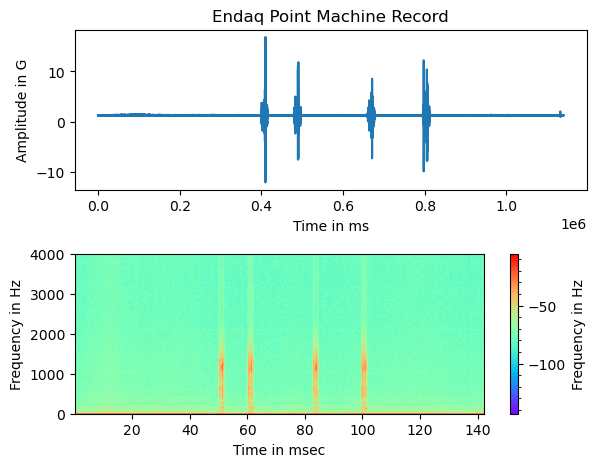

In [6]:
# import necessary modules
import numpy as np

# convert pandas to numpy
enqDataXYZ = enqData.to_numpy()

# get Z channel only
enqDataZ = enqDataXYZ[:,2]

# sample rate from table
enqDataFs = 8000

# show time domain and spectrogram
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig = plt.subplot(211)
plt.title('Endaq Point Machine Record')

plt.plot(enqDataZ)
plt.xlabel('Time in ms')
plt.ylabel('Amplitude in G')

plt.subplot(212)
a,b,c,im = plt.specgram(enqDataZ, Fs=enqDataFs, NFFT=1024, cmap="rainbow")
plt.ylabel('Frequency in Hz')
plt.xlabel('Time in msec')

cbar = plt.colorbar(im)
cbar.set_label('Frequency in Hz')
cbar.minorticks_on()

plt.show()